Importing libraries 

In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2
import matplotlib.pyplot as plt

LeNet Class

In [2]:
class LeNet:
    def __init__(self, batch_size=32, epochs=20):
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self._create_lenet()
        self._compile()

    def _create_lenet(self):
        self.model = Sequential([
            Conv2D(filters=6, kernel_size=(5, 5),
                   activation='sigmoid', input_shape=(28, 28, 1),
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Conv2D(filters=16, kernel_size=(5, 5),
                   activation='sigmoid',
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Flatten(),

            Dense(120, activation='sigmoid'),
            Dense(84, activation='sigmoid'),
            Dense(10, activation='softmax')
        ])

    def _compile(self):
        if self.model is None:
            print('Error: Create a model first..')
        self.model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    def _preprocess(self):
        # load mnist data
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # normalize
        x_train = x_train / 255.0
        x_test = x_test / 255.0

        # add channel dim
        self.x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
        self.x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

        # one-hot encoding
        self.y_train = to_categorical(y_train, 10)
        self.y_test = to_categorical(y_test, 10)

    def train(self):
        self._preprocess()
        self.model.fit(self.x_train, self.y_train,
                       batch_size=self.batch_size,
                       epochs=self.epochs)

    def save(self, model_path_name):
        """Save the model with a specified name."""
        if self.model:
            self.model.save(f"{model_path_name}.keras")
            print(f"Model saved as {model_path_name}.keras")
        else:
            print("Error: No model to save.")

    def load(self, model_path_name):
        """Load a saved model."""
        try:
            self.model = load_model(f"{model_path_name}.keras")
            print(f"Model loaded from {model_path_name}.keras")
        except Exception as e:
            print(f"Error loading model: {e}")

    def predict(self, images):
        """Predict the class of a list of images."""
        if not self.model:
            print("Error: Model is not loaded or created.")
            return None
        # Ensure images are preprocessed
        images = np.array(images) / 255.0  # Normalize
        if len(images.shape) == 3:  # Add channel dimension if needed
            images = images.reshape(images.shape[0], 28, 28, 1)
        predictions = self.model.predict(images)
        return np.argmax(predictions, axis=1)


Using LeNet class to train and save model

In [3]:
lenet = LeNet(batch_size=32, epochs=20)

In [5]:
print("Training the model...")
lenet.train()
# Save the trained model
model_name = "bhatia_cnn_model"
lenet.save(model_name)

Training the model...
Epoch 1/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0974 - accuracy: 0.9704
Epoch 2/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0756 - accuracy: 0.9767
Epoch 3/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0618 - accuracy: 0.9806
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0524 - accuracy: 0.9836
Epoch 5/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0468 - accuracy: 0.9852
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0413 - accuracy: 0.9867
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0364 - accuracy: 0.9887
Epoch 8/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0334 - accuracy: 0.9890
Epoch 9/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0292 - accuracy: 0.9906
Epoch 10/20
1875/1875 [===================

In [6]:
lenet_loaded = LeNet()
lenet_loaded.load(model_name)


Model loaded from bhatia_cnn_model.keras


Predictions 

In [7]:
def preprocess_image(image_path):
    """Preprocess an image for prediction."""
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} could not be loaded.")
    # Resize the image to 28x28 pixels
    image = cv2.resize(image, (28, 28))
    # Normalize the image and reshape to match model input
    image = image / 255.0
    image = image.reshape(1, 28, 28, 1)  # Batch size 1, channel 1
    return image

In [8]:
def test_model(image_path, true_digit):
    """Test the model with an input image and the true digit."""
    try:
        # Preprocess the image
        image = preprocess_image(image_path)

        # Predict the digit
        prediction = lenet_loaded.predict(image)
        predicted_digit = prediction[0]

        # Display the image
        img_to_display = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_to_display, cmap='gray')
        plt.title(f"Predicted Digit: {predicted_digit}")
        plt.axis('off')
        plt.show()

        # Compare the result with the true digit
        if predicted_digit == true_digit:
            print(f"Success: Image {image_path} is for digit {true_digit} and recognized as {predicted_digit}.")
        else:
            print(f"Fail: Image {image_path} is for digit {true_digit} but the inference result is {predicted_digit}.")

    except Exception as e:
        print(f"Error: {e}")



1/1 [==============================] - 0s 120ms/step


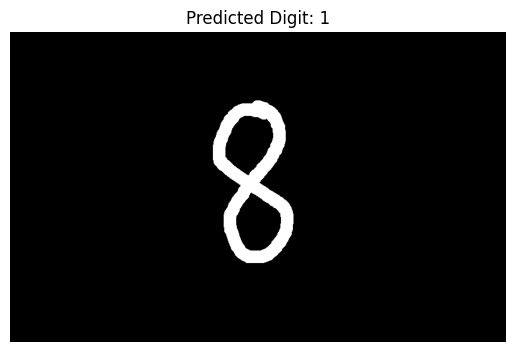

Fail: Image D:\UMD\Neural Networks\Assignment GIthub\ece5831-2024-assignments\08\Custom MNIST Samples\Digit 8\8_1.png is for digit 8 but the inference result is 1.


In [9]:
# Example test case
# Replace 'test_image.png' with the path to your test image
# and set the correct true digit for the image
test_image_path = r"D:\UMD\Neural Networks\Assignment GIthub\ece5831-2024-assignments\08\Custom MNIST Samples\Digit 8\8_1.png"  # Example: Path to your handwritten digit image
true_digit = 8  # Replace with the correct digit in the image
test_model(test_image_path, true_digit)

1/1 [==============================] - 0s 22ms/step


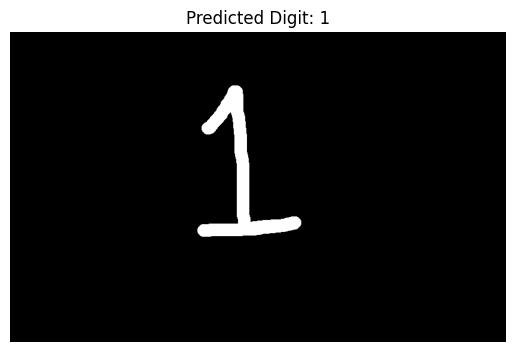

Success: Image D:\UMD\Neural Networks\Assignment GIthub\ece5831-2024-assignments\08\Custom MNIST Samples\Digit 1\1_1.png is for digit 1 and recognized as 1.


In [10]:
# Example test case
# Replace 'test_image.png' with the path to your test image
# and set the correct true digit for the image
test_image_path = r"D:\UMD\Neural Networks\Assignment GIthub\ece5831-2024-assignments\08\Custom MNIST Samples\Digit 1\1_1.png"  # Example: Path to your handwritten digit image
true_digit = 1  # Replace with the correct digit in the image
test_model(test_image_path, true_digit)

In [11]:
!python module8.py "./Custom MNIST Samples/Digit 2/2_3.png" 2

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 2/2_3.png

1/1 [==============================] - 0s 255ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 2/2_3.png is for digit 2 but the inference result is 1.


Testing the model for predicting mnist dataset 

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
predictions = lenet.model.predict(x_test[:10])
print("Predictions:", np.argmax(predictions, axis=1))


1/1 [==============================] - 0s 91ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9]


In [14]:
predictions = lenet.model.predict(x_test[:10])
print("Predictions:", np.argmax(predictions, axis=1))



1/1 [==============================] - 0s 25ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9]


In [15]:
from tensorflow import keras

In [16]:
keras.utils.to_categorical(y_train, num_classes=10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test =  keras.utils.to_categorical(y_test, num_classes=10)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
labels = np.argmax(y_test[0:10], axis=1)

In [20]:
labels

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [21]:
predictions = np.argmax(predictions, axis=1)

In [22]:
predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [23]:
predictions == labels


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Testing on all handwritten images

In [1]:
!python module8.py "./Custom MNIST Samples/Digit 0/0_0.png" 0

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 0/0_0.png

1/1 [==============================] - 0s 332ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 0/0_0.png is for digit 0 but the inference result is 1.


In [2]:
!python module8.py "./Custom MNIST Samples/Digit 0/0_1.png" 0

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 0/0_1.png

1/1 [==============================] - 0s 256ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 0/0_1.png is for digit 0 but the inference result is 1.


In [3]:
!python module8.py "./Custom MNIST Samples/Digit 0/0_2.png" 0

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 0/0_2.png

1/1 [==============================] - 0s 248ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 0/0_2.png is for digit 0 but the inference result is 1.


In [4]:
!python module8.py "./Custom MNIST Samples/Digit 0/0_3.png" 0

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 0/0_3.png

1/1 [==============================] - 0s 252ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 0/0_3.png is for digit 0 but the inference result is 1.


In [5]:
!python module8.py "./Custom MNIST Samples/Digit 0/0_4.png" 0

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 0/0_4.png

1/1 [==============================] - 0s 271ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 0/0_4.png is for digit 0 but the inference result is 1.


In [6]:
!python module8.py "./Custom MNIST Samples/Digit 1/1_0.png" 1

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 1/1_0.png

1/1 [==============================] - 0s 253ms/step
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 1/1_0.png is for digit 1 and recognized as 1.


In [7]:
!python module8.py "./Custom MNIST Samples/Digit 1/1_1.png" 1

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 1/1_1.png

1/1 [==============================] - 0s 249ms/step
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 1/1_1.png is for digit 1 and recognized as 1.


In [8]:
!python module8.py "./Custom MNIST Samples/Digit 1/1_2.png" 1

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 1/1_2.png

1/1 [==============================] - 0s 269ms/step
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 1/1_2.png is for digit 1 and recognized as 1.


In [9]:
!python module8.py "./Custom MNIST Samples/Digit 1/1_3.png" 1

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 1/1_3.png

1/1 [==============================] - 0s 259ms/step
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 1/1_3.png is for digit 1 and recognized as 1.


In [10]:
!python module8.py "./Custom MNIST Samples/Digit 1/1_4.png" 1

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 1/1_4.png

1/1 [==============================] - 0s 267ms/step
Figure(640x480)
Success: Image ./Custom MNIST Samples/Digit 1/1_4.png is for digit 1 and recognized as 1.


In [11]:
!python module8.py "./Custom MNIST Samples/Digit 2/2_0.png" 2

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 2/2_0.png

1/1 [==============================] - 0s 323ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 2/2_0.png is for digit 2 but the inference result is 1.


In [12]:
!python module8.py "./Custom MNIST Samples/Digit 2/2_1.png" 2

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 2/2_1.png

1/1 [==============================] - 0s 279ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 2/2_1.png is for digit 2 but the inference result is 1.


In [13]:
!python module8.py "./Custom MNIST Samples/Digit 2/2_2.png" 2

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 2/2_2.png

1/1 [==============================] - 0s 252ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 2/2_2.png is for digit 2 but the inference result is 1.


In [14]:
!python module8.py "./Custom MNIST Samples/Digit 2/2_3.png" 2

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 2/2_3.png

1/1 [==============================] - 0s 252ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 2/2_3.png is for digit 2 but the inference result is 1.


In [15]:
!python module8.py "./Custom MNIST Samples/Digit 2/2_4.png" 2

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 2/2_4.png

1/1 [==============================] - 0s 267ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 2/2_4.png is for digit 2 but the inference result is 1.


In [16]:
""" 
For some reason when i test the model on my own dataset, it always gives me 1 as the result. 
i tried all the preprocessing, grayscale, centering the image, everything but always get 1 as the result. 
But since the model can predict the mnist dataset with 99.66% accuracy, 
i think that i need to preprocess my data in a different way for the model to predict correctly
 """

!python module8.py "./Custom MNIST Samples/Digit 3/3_0.png" 3


Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 3/3_0.png

1/1 [==============================] - 0s 271ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 3/3_0.png is for digit 3 but the inference result is 1.


In [17]:
!python module8.py "./Custom MNIST Samples/Digit 3/3_1.png" 3

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 3/3_1.png

1/1 [==============================] - 0s 242ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 3/3_1.png is for digit 3 but the inference result is 1.


In [18]:
!python module8.py "./Custom MNIST Samples/Digit 3/3_2.png" 3

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 3/3_2.png

1/1 [==============================] - 0s 256ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 3/3_2.png is for digit 3 but the inference result is 1.


In [19]:
!python module8.py "./Custom MNIST Samples/Digit 3/3_3.png" 3

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 3/3_3.png

1/1 [==============================] - 0s 276ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 3/3_3.png is for digit 3 but the inference result is 1.


In [20]:
!python module8.py "./Custom MNIST Samples/Digit 3/3_4.png" 3

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 3/3_4.png

1/1 [==============================] - 0s 260ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 3/3_4.png is for digit 3 but the inference result is 1.


In [21]:
!python module8.py "./Custom MNIST Samples/Digit 4/4_0.png" 4

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 4/4_0.png

1/1 [==============================] - 0s 250ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 4/4_0.png is for digit 4 but the inference result is 1.


In [22]:
!python module8.py "./Custom MNIST Samples/Digit 4/4_1.png" 4

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 4/4_1.png

1/1 [==============================] - 0s 286ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 4/4_1.png is for digit 4 but the inference result is 1.


In [23]:
!python module8.py "./Custom MNIST Samples/Digit 4/4_4.png" 4

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 4/4_4.png

1/1 [==============================] - 0s 253ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 4/4_4.png is for digit 4 but the inference result is 1.


In [26]:
!python module8.py "./Custom MNIST Samples/Digit 4/4_3.png" 4

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 4/4_3.png

1/1 [==============================] - 0s 261ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 4/4_3.png is for digit 4 but the inference result is 1.


In [24]:
!python module8.py "./Custom MNIST Samples/Digit 5/5_0.png" 5

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 5/5_0.png

1/1 [==============================] - 0s 268ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 5/5_0.png is for digit 5 but the inference result is 1.


In [25]:
!python module8.py "./Custom MNIST Samples/Digit 5/5_1.png" 5

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 5/5_1.png

1/1 [==============================] - 0s 250ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 5/5_1.png is for digit 5 but the inference result is 1.


In [26]:
!python module8.py "./Custom MNIST Samples/Digit 5/5_2.png" 5

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 5/5_2.png

1/1 [==============================] - 0s 276ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 5/5_2.png is for digit 5 but the inference result is 1.


In [27]:
!python module8.py "./Custom MNIST Samples/Digit 5/5_3.png" 5

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 5/5_3.png

1/1 [==============================] - 0s 318ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 5/5_3.png is for digit 5 but the inference result is 1.


In [27]:
!python module8.py "./Custom MNIST Samples/Digit 5/5_4.png" 5

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 5/5_4.png

1/1 [==============================] - 0s 275ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 5/5_4.png is for digit 5 but the inference result is 1.


In [28]:
!python module8.py "./Custom MNIST Samples/Digit 6/6_0.png" 6

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 6/6_0.png

1/1 [==============================] - 0s 263ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 6/6_0.png is for digit 6 but the inference result is 1.


In [29]:
!python module8.py "./Custom MNIST Samples/Digit 6/6_1.png" 6

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 6/6_1.png

1/1 [==============================] - 0s 339ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 6/6_1.png is for digit 6 but the inference result is 1.


In [30]:
!python module8.py "./Custom MNIST Samples/Digit 6/6_2.png" 6

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 6/6_2.png

1/1 [==============================] - 0s 247ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 6/6_2.png is for digit 6 but the inference result is 1.


In [28]:
!python module8.py "./Custom MNIST Samples/Digit 6/6_3.png" 6

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 6/6_3.png

1/1 [==============================] - 0s 268ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 6/6_3.png is for digit 6 but the inference result is 1.


In [31]:
!python module8.py "./Custom MNIST Samples/Digit 7/7_0.png" 7

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 7/7_0.png

1/1 [==============================] - 0s 251ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 7/7_0.png is for digit 7 but the inference result is 1.


In [32]:
!python module8.py "./Custom MNIST Samples/Digit 7/7_1.png" 7

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 7/7_1.png

1/1 [==============================] - 0s 263ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 7/7_1.png is for digit 7 but the inference result is 1.


In [33]:
!python module8.py "./Custom MNIST Samples/Digit 7/7_2.png" 7

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 7/7_2.png

1/1 [==============================] - 0s 270ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 7/7_2.png is for digit 7 but the inference result is 1.


In [29]:
!python module8.py "./Custom MNIST Samples/Digit 7/7_3.png" 7

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 7/7_3.png

1/1 [==============================] - 0s 268ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 7/7_3.png is for digit 7 but the inference result is 1.


In [34]:
!python module8.py "./Custom MNIST Samples/Digit 8/8_0.png" 8

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 8/8_0.png

1/1 [==============================] - 0s 254ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 8/8_0.png is for digit 8 but the inference result is 1.


In [35]:
!python module8.py "./Custom MNIST Samples/Digit 8/8_1.png" 8

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 8/8_1.png

1/1 [==============================] - 0s 261ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 8/8_1.png is for digit 8 but the inference result is 1.


In [36]:
!python module8.py "./Custom MNIST Samples/Digit 8/8_2.png" 8

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 8/8_2.png

1/1 [==============================] - 0s 260ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 8/8_2.png is for digit 8 but the inference result is 1.


In [30]:
!python module8.py "./Custom MNIST Samples/Digit 8/8_3.png" 8

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 8/8_3.png

1/1 [==============================] - 0s 271ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 8/8_3.png is for digit 8 but the inference result is 1.


In [37]:
!python module8.py "./Custom MNIST Samples/Digit 9/9_0.png" 9

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 9/9_0.png

1/1 [==============================] - 0s 251ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 9/9_0.png is for digit 9 but the inference result is 1.


In [38]:
!python module8.py "./Custom MNIST Samples/Digit 9/9_1.png" 9

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 9/9_1.png

1/1 [==============================] - 0s 242ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 9/9_1.png is for digit 9 but the inference result is 1.


In [39]:
!python module8.py "./Custom MNIST Samples/Digit 9/9_2.png" 9

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 9/9_2.png

1/1 [==============================] - 0s 243ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 9/9_2.png is for digit 9 but the inference result is 1.


In [32]:
!python module8.py "./Custom MNIST Samples/Digit 9/9_3.png" 9

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 9/9_3.png

1/1 [==============================] - 0s 254ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 9/9_3.png is for digit 9 but the inference result is 1.


In [40]:
!python module8.py "./Custom MNIST Samples/Digit 9/9_4.png" 9

Model bhatia_cnn_model.keras found. Loading the saved model...
Model loaded from bhatia_cnn_model.keras
Processing image: ./Custom MNIST Samples/Digit 9/9_4.png

1/1 [==============================] - 0s 249ms/step
Figure(640x480)
Fail: Image ./Custom MNIST Samples/Digit 9/9_4.png is for digit 9 but the inference result is 1.
